In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FF9145E80>,
      dtype=object)

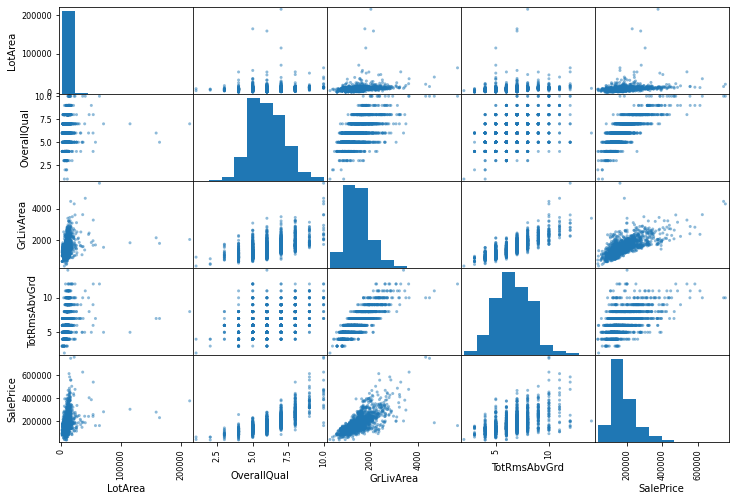

In [3]:
num_attribs = ['LotArea', 'OverallQual', 'GrLivArea', 'TotRmsAbvGrd']
cat_attribs = ['SaleCondition', 'BldgType']
pd.plotting.scatter_matrix(train[num_attribs + ['SalePrice']], figsize = (12,8))

In [4]:
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(), cat_attribs)])
def dataPrep(data):
    data.set_index('Id')
    X = full_pipeline.fit_transform(data[num_attribs + cat_attribs])
    return X

In [5]:
X_train = dataPrep(train)
y_train = train['SalePrice']
X_test = dataPrep(test)

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)
mean_squared_error(y_train, y_pred, squared = False)

72793.83143901953

In [7]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
scoresRMSE = np.sqrt(-scores)

In [8]:
scoresRMSE.mean()

72587.15186738133

In [9]:
scoresRMSE.std()

8583.778118842209

In [10]:
y_test_pred = lin_reg.predict(X_test)

In [11]:
final = pd.DataFrame({'SalePrice':y_test_pred}, index = test['Id'])
final.to_csv('final.csv')